Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0


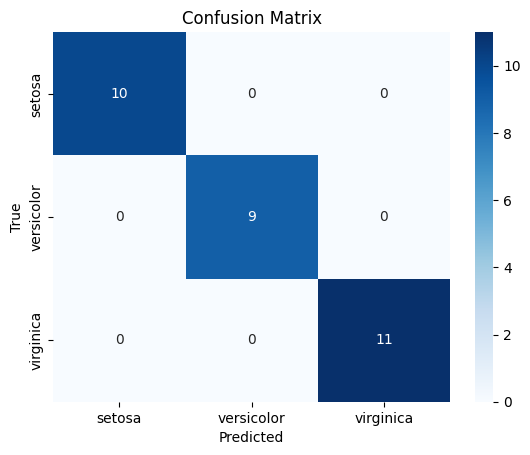

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data["target"] = iris.target
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)

sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=iris.target_names,yticklabels=iris.target_names,)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [1]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
X, y = make_regression()
best_alpha = min([Lasso(alpha=a).fit(X, y).score(X, y) for a in [0.1, 0.01, 0.001]])
print("Best performance (R^2 Score):", best_alpha)

Best performance (R^2 Score): 0.9999874563128037


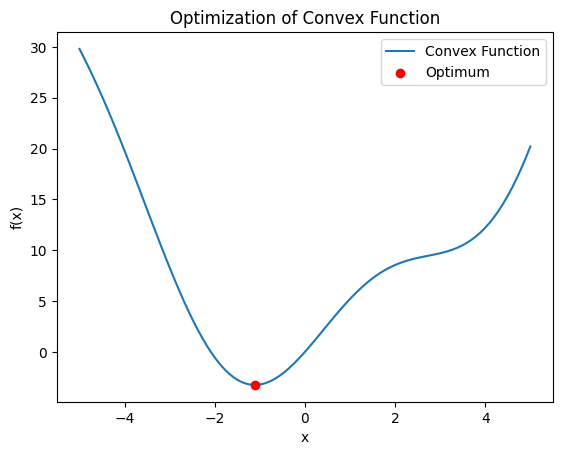

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
def convex_function(x):
    return x**2 + 5 * np.sin(x)

result = minimize_scalar(convex_function)

x_values = np.linspace(-5, 5, 100)
y_values = convex_function(x_values)

plt.plot(x_values, y_values, label="Convex Function")
plt.scatter(result.x, convex_function(result.x), color="red", label="Optimum", zorder=5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optimization of Convex Function")
plt.legend()
plt.show()

In [4]:
import numpy as np
from scipy.optimize import minimize

def objective_function(x):
    return x[0] ** 2 + x[1] ** 2

def constraint_function(x):
    return np.array([x[0] + x[1] - 1])


initial_guess = [0, 0]
variable_bounds = ((-np.inf, np.inf), (-np.inf, np.inf))
constraints = {"type": "eq", "fun": constraint_function}
result = minimize(objective_function,initial_guess,method="SLSQP",bounds=variable_bounds,constraints=constraints,)

print("Optimal solution:")
print("x =", result.x)
print("Minimum value =", result.fun)

Optimal solution:
x = [0.5 0.5]
Minimum value = 0.5


In [6]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv("data.csv")
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

user_item_matrix = train_data.pivot(index="user_id", columns="item_id", values="rating").fillna(0)

def predict_ratings(user_id, item_id):
    user_ratings = user_item_matrix.loc[user_id]
    similar_users = user_item_matrix.corrwith(user_ratings)
    similar_users = similar_users.dropna()

    weighted_ratings = (user_item_matrix.loc[similar_users.index, item_id] * similar_users)
    predicted_rating = weighted_ratings.sum() / similar_users.abs().sum()

    return predicted_rating

test_data["predicted_rating"] = test_data.apply(lambda row: predict_ratings(row["user_id"], row["item_id"]), axis=1)

rmse = sqrt(mean_squared_error(test_data["rating"], test_data["predicted_rating"]))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 3.624336247184741


In [11]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/deadsoul/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize

# Sample documents
documents = [
    "Natural language processing is a subfield of linguistics, computer science, and artificial intelligence.",
    "Machine learning is a subfield of artificial intelligence that focuses on the development of algorithms.",
    "Artificial intelligence is the simulation of human intelligence processes by machines.",
    "Deep learning is a subset of machine learning that focuses on neural networks.",
]

# Tokenize documents
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)

# Train Doc2Vec model
tagged_documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_docs)]
doc2vec_model = Doc2Vec(tagged_documents, vector_size=100, window=5, min_count=1, workers=4)

# Calculate cosine similarity using Word2Vec embeddings
def cosine_similarity_word2vec(doc1, doc2):
    vec1 = sum([word2vec_model.wv[word] for word in doc1 if word in word2vec_model.wv])
    vec2 = sum([word2vec_model.wv[word] for word in doc2 if word in word2vec_model.wv])
    return cosine_similarity([vec1], [vec2])[0][0]

# Calculate cosine similarity using Doc2Vec embeddings
def cosine_similarity_doc2vec(doc1, doc2):
    vec1 = doc2vec_model.infer_vector(doc1)
    vec2 = doc2vec_model.infer_vector(doc2)
    return cosine_similarity([vec1], [vec2])[0][0]

# Calculate Jaccard similarity
def jaccard_similarity(doc1, doc2):
    intersection = len(set(doc1).intersection(doc2))
    union = len(set(doc1).union(doc2))
    return intersection / union if union != 0 else 0

# Example usage
doc1 = word_tokenize("Natural language processing is a subfield of artificial intelligence.")
doc2 = word_tokenize("Deep learning is a subset of machine learning.")
doc3 = word_tokenize("Machine learning involves the use of algorithms.")

print("Cosine similarity using Word2Vec embeddings:", cosine_similarity_word2vec(doc1, doc2))
print("Cosine similarity using Doc2Vec embeddings:", cosine_similarity_doc2vec(doc1, doc2))
print("Jaccard similarity:", jaccard_similarity(doc1, doc3))


Cosine similarity using Word2Vec embeddings: 0.48333102
Cosine similarity using Doc2Vec embeddings: -0.1598177
Jaccard similarity: 0.125
